# Principal component analysis 
PCA (Principal component analysis) is a powerful tool often used in dimensionality reduction.

We will today use PCA to reduce the dimensionality of the Iris dataset from $X \in \mathbb{R}^4$ to $X' \in \mathbb{R}^2$.

In [2]:
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# plot data and fit (2d only)
def plot_fit(X, y, clf):
    """
    X = samples
    y = Ground truth
    clf = trained model
    """
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors= "black")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

In [3]:
# import some data to play with
iris = sk.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
display(iris_df)
X = StandardScaler().fit_transform(iris_df)
target = iris.target
print ("Number of samples ::", X.shape[0])
print("Number of features ::", X.shape[1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Number of samples :: 150
Number of features :: 4


## Dimensionality reduction.
To use PCA in practice, simply use the following function:

```{Python}
pca = PCA(n_components = n )
principalComponents = pca.fit_transform(data_to_transform)

```
Find the documentation here: [sklearn PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [4]:
###
# Code here
###
n = X.shape[1]
pca = PCA(n_components = n )
principalComponents = pca.fit_transform(X)

Plot the principal components and compare them to X:

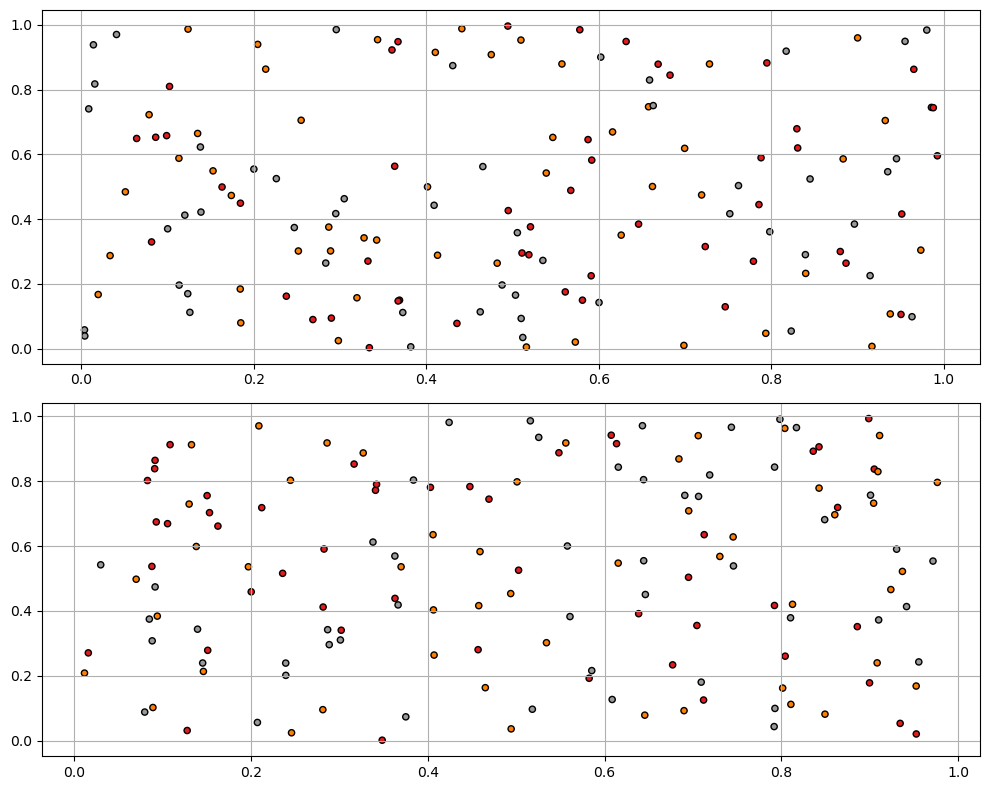

In [5]:
###
# code here
# replace x, y and x1, y1 with the values from your computed pca and your X
###
fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(211)

#Plot scaled version
x, y = np.random.rand(2, 150)
g = plt.scatter(x, y, c = target, cmap = plt.cm.Set1, edgecolor = 'black', s = 20)
plt.grid()
plt.subplot(212)

# Plot principal components
x1, y1 = np.random.rand(2, 150)
plt.scatter(x1, y1, c = target,cmap = plt.cm.Set1, edgecolor = 'black', s = 20)
plt.grid()
plt.tight_layout()
plt.show()

## Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

By using the attribute `explained_variance_ratio_`, you can see that the first principal component explains 72.77% of the variance and the second principal component explains 23.03% of the variance.

In [6]:
print(pca.explained_variance_ratio_)

print(sum(pca.explained_variance_ratio_))

[0.72962445 0.22850762 0.03668922 0.00517871]
1.0


So, in total our PCA has now expressed 96% of the variance of the dataset.
We can use these new components to attempt to fit an SVM like we did in the previous exercise. The lower dimensional data should retain most of the information in the original data and therefore should compete close to on par with a classifier trained on all features.

## Exercises
### 1) SVM
Apply an SVM to the principal components. How does it perform compared to using only two features per sample?

## 2) Three principal components
Attempt with three principal components. 
How much of the variance of the data do these express? 

Again, make a 3D plot where each point is colored respective to the predicted class from your SVM.

## 3) Best accuracy
Compare all the different SVM's we have trained. What is the best accuracy you can acheive?. You are also allowed to use different kernels!

## 4) Grid search
Attempt to perform a grid search with the function provided by `sklearn`.
The `gridsearch` function will try a lot of different combinations of parameters for your SVM so you don't have to.
```{Python}
from sklearn.model_selection import GridSearchCV
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, y_train)
```
[GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


Are you able to get a better fit?

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
def create_prediction(kernel,X_train, X_test, y_train, y_test):
    pipeline = make_pipeline(StandardScaler(), kernel)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    return y_pred

In [8]:
# 1
n = X.shape[1]
pca = PCA(n_components = n )
principalComponents = pca.fit_transform(X)

X_scaled = StandardScaler().fit_transform(principalComponents)

n = 0.2
X_train, X_test, y_train, y_test = train_test_split(principalComponents, target, test_size=n, shuffle=True)

svm = sk.svm.SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = svm.predict(X_test)

# Evaluate the performance of the SVM
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 96.67%


In [9]:
# 2
pca = PCA(n_components = 3 )
principalComponents = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

print(sum(pca.explained_variance_ratio_))

[0.72962445 0.22850762 0.03668922]
0.9948212908928452


In [10]:
# 3
C = 1.0
gamma = 'scale'
degree = 3
svc = sk.svm.SVC(kernel='linear', C=C)
rbf_svc = sk.svm.SVC(kernel='rbf', gamma=gamma, C=C)
poly_svc = sk.svm.SVC(kernel='poly', degree=degree, C=C)
create_prediction(svc,X_train, X_test, y_train, y_test)
create_prediction(rbf_svc,X_train, X_test, y_train, y_test)
create_prediction(poly_svc,X_train, X_test, y_train, y_test)

1.0
0.9666666666666667
0.8666666666666667


array([0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2,
       2, 2, 0, 2, 2, 1, 2, 1])

In [11]:
from sklearn.model_selection import GridSearchCV
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}
svc = sk.svm.SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, y_train)
sorted(grid.cv_results_.keys())
optimal_c = grid.best_params_['C']
print(grid)
print(grid.best_params_)
print(optimal_c)

svc = sk.svm.SVC(kernel='linear', C=optimal_c)
create_prediction(svc,X_train, X_test, y_train, y_test)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([7.43014730e-01, 1.11980870e+00, 1.68768058e+00, 2.54352885e+00,
       3.83339069e+00, 5.77736091e+00, 8.70714775e+00, 1.31226737e+01,
       1.97773794e+01, 2.98067867e+01, 4.49222576e+01, 6.77030119e+01,
       1.02036230e+02, 1.53780341e+02, 2.31764671e+02, 3.49296030e+02,
       5.26429314e+02, 7.93389557e+0...
       7.22931329e+04, 1.08954071e+05, 1.64206323e+05, 2.47477825e+05,
       3.72977562e+05, 5.62120108e+05, 8.47179691e+05, 1.27679729e+06,
       1.92428044e+06, 2.90011207e+06, 4.37080263e+06, 6.58730256e+06,
       9.92782301e+06, 1.49623718e+07, 2.25500161e+07, 3.39854693e+07,
       5.12200133e+07, 7.71944543e+07, 1.16340926e+08, 1.75339164e+08,
       2.64256298e+08, 3.98264652e+08])},
             scoring='accuracy')
0.7430147299885189
1.0


array([0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 1])

In [12]:
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c, "kernel" : ['linear', 'rbf', 'poly'], "gamma" : ["scale", "auto"]}

grid = sk.model_selection.GridSearchCV(sk.svm.SVC(), param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(principalComponents, target)
grid.score(principalComponents, target)

0.96

In [13]:
print(grid)
print(grid.best_params_)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([7.43014730e-01, 1.11980870e+00, 1.68768058e+00, 2.54352885e+00,
       3.83339069e+00, 5.77736091e+00, 8.70714775e+00, 1.31226737e+01,
       1.97773794e+01, 2.98067867e+01, 4.49222576e+01, 6.77030119e+01,
       1.02036230e+02, 1.53780341e+02, 2.31764671e+02, 3.49296030e+02,
       5.26429314e+02, 7.93389557e+02, 1.19572936e+0...
       3.72977562e+05, 5.62120108e+05, 8.47179691e+05, 1.27679729e+06,
       1.92428044e+06, 2.90011207e+06, 4.37080263e+06, 6.58730256e+06,
       9.92782301e+06, 1.49623718e+07, 2.25500161e+07, 3.39854693e+07,
       5.12200133e+07, 7.71944543e+07, 1.16340926e+08, 1.75339164e+08,
       2.64256298e+08, 3.98264652e+08]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')
{'C': 1.1198087034903326, 'gamma': 'scale', 'kernel': 'linear'}
